# Bank Costumer Churn Model

**Objective:**  
To develop a machine learning model that predicts customer churn for a bank by analyzing key factors such as transaction history, demographics, and account activities. The model aims to identify customers at risk of leaving, enabling the bank to take proactive measures to improve customer retention and optimize marketing strategies.

**Data Source:**
https://github.com/YBI-Foundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [110]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [111]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [113]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [114]:
df.duplicated('CustomerId').sum()

0

In [115]:
df = df.set_index('CustomerId')

In [116]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [117]:
df.replace({'Geography':{'France':0,'Germany':1,'Spain':2}},inplace = True)

In [118]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [119]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [120]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [121]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [122]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace = True)

In [123]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [124]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [125]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [126]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

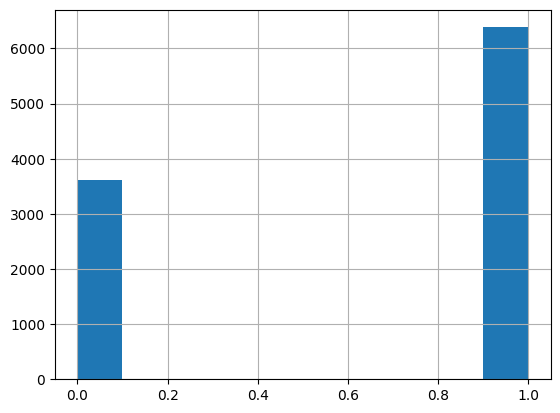

In [127]:
df['Zero Balance'].hist()

In [128]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

In [129]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [130]:
x = df.drop(['Surname', 'Churn'],axis=1)

In [131]:
y = df['Churn']

In [132]:
x.shape, y.shape

((10000, 11), (10000,))

In [133]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


In [134]:
from imblearn.under_sampling import RandomUnderSampler

In [135]:
rus = RandomUnderSampler(random_state = 2529)

In [136]:
x_rus, y_rus = rus.fit_resample(x,y)

In [137]:
x_rus.shape, y_rus.shape

((4074, 11), (4074,))

In [138]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


In [139]:
from imblearn.over_sampling import RandomOverSampler

In [140]:
ros = RandomOverSampler(random_state = 2529)


In [141]:
x_ros, y_ros = ros.fit_resample(x,y)

In [142]:
x_ros.shape, y_ros.shape

((15926, 11), (15926,))

In [143]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

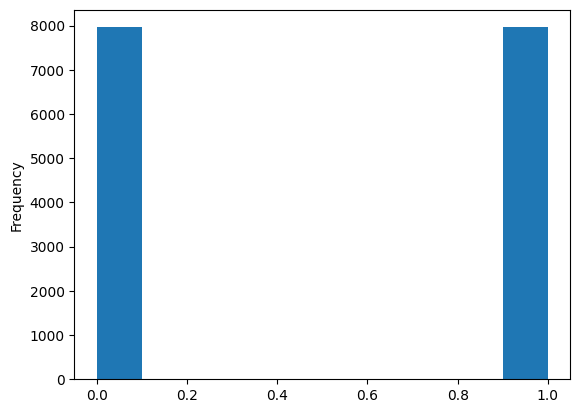

In [144]:
y_ros.plot(kind = 'hist')

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 2529)

In [147]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus,y_rus,test_size = 0.3, random_state = 2529)

In [148]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros,y_ros,test_size = 0.3, random_state = 2529)

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
sc = StandardScaler()

In [151]:
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [152]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [153]:
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [154]:
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


In [155]:
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


In [156]:
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])


In [160]:
from sklearn.svm import SVC

In [161]:
svc = SVC()

In [163]:
svc.fit(x_train,y_train)

SVC()

In [167]:
y_pred = svc.predict(x_test)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report

In [168]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 435,  151]])

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [174]:
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)

In [175]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [176]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [182]:
grid_predictions = grid.predict(x_test)

In [183]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [184]:
print(classification_report(grid_predictions,y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2502
           1       0.41      0.49      0.45       498

    accuracy                           0.80      3000
   macro avg       0.65      0.68      0.66      3000
weighted avg       0.81      0.80      0.81      3000



In [185]:
svc_rus = SVC()

In [186]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [189]:
y_pred_rus = svc_rus.predict(x_test_rus)

In [191]:
confusion_matrix(y_pred_rus,y_test_rus)

array([[470, 172],
       [157, 424]])

In [194]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [195]:
grid_rus = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)

In [196]:
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [197]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [198]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [203]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [202]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [205]:
svc_ros = SVC()

In [206]:
svc_ros.fit(x_train_ros,y_train_ros)

SVC()

In [207]:
y_pred_ros = svc_ros.predict(x_test_ros)

In [208]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1818,  561],
       [ 627, 1772]])

In [209]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [210]:
grid_ros = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)

In [211]:
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [214]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [215]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [216]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



The *grid_predictions_ros* model, a finely-tuned version utilizing Random Over-Sampling, outperforms other models based on raw data or Random Under-Sampling. It achieves a high overall accuracy of 92% and excels with a 97% accuracy in predicting churn. This performance is attributed to the application of Random Over-Sampling, data standardization, preprocessing, appropriate encoding, and optimal hyperparameter tuning.